In [1]:
# Plotting library
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import gridspec

# Numerical Library
import numpy as np
from numpy import genfromtxt
from numpy.linalg import inv

# Image manipulation library
from PIL import Image

# Limit printout to 3 decimal places
np.set_printoptions(precision=3,suppress=True)

# Allows for printing inline for jupyter notebook
%matplotlib inline 

# http://scikit-learn.org/stable/tutorial/machine_learning_map/

In [2]:
# Load datasets and store in ndarray
raw_train = genfromtxt('usps-4-9-train.csv', delimiter=',')
raw_test = genfromtxt('usps-4-9-test.csv', delimiter=',')

In [12]:
print raw_train[:,256][np.newaxis].T

[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 1.]
 [ 1.]
 [ 1.]]


In [13]:
# Split off known target values
y_train = raw_train[:,256]
y_test = raw_test[:,256]

# Add dimension to y_train and transpose
y_train = y_train[np.newaxis].T
y_test = y_test[np.newaxis].T

# Remove column 256 from X
raw_train = np.delete(raw_train, 256, axis=1)
raw_test = np.delete(raw_test, 256, axis=1)

## NOT COMPLETELY SURE WE NEED DUMMY ONES

# Function to create array of dummy ones and returned 
# columnar vector
def make_dummy_vector(target):
   temp = np.ones(len(target))
   return temp[np.newaxis].T

# Create dummy 1 values
dummy_train = make_dummy_vector(raw_train)
dummy_test = make_dummy_vector(raw_test)

# Add dummy data to feature matrices
X_train = np.concatenate((dummy_train, raw_train), axis=1)
X_test = np.concatenate((dummy_test, raw_test), axis=1)


# In case we don't need dummy ones
#X_train = raw_train
#X_test = raw_test

In [15]:
# Data for a single sample
print raw_train[0]

[   0.    0.    0.    0.    0.    0.    0.    0.   11.  133.  195.    7.
    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.   12.  120.
  220.  255.  149.    2.    0.    0.    0.    0.    0.    0.    0.   20.
  113.  172.  239.  255.  255.   72.    0.    0.    0.    0.    0.    0.
    0.    0.  122.  255.  253.  174.  105.  155.  255.    3.    0.    0.
    0.    0.    0.    0.    0.   73.  243.  183.   17.    0.    0.  144.
  244.    2.    0.    0.    0.    0.   30.   28.    0.    0.    0.    0.
    0.    0.    0.   98.  201.    0.    0.   15.  102.  179.  255.  174.
    0.    0.    0.    0.    0.    0.    0.  155.  212.   90.  167.  253.
  255.  206.   94.   16.    0.    0.    0.    0.    0.    0.   25.  223.
  255.  239.  139.   64.   43.    0.    0.    0.    0.    0.    0.    0.
   37.  154.  251.  255.  166.   12.    0.    0.    0.    0.    0.    0.
    0.   22.  116.  205.  252.  173.   97.  255.  109.    0.    0.    0.
    0.    0.    0.    0.   90.  248.  198.   93.   

In [19]:
## This is not completely working, we need to figure out why the image seems upside down ##

# Displays a single sample for context
def visualize_sample(data,target):
    temp = np.reshape(data[target],(16,16))
    img = Image.fromarray(temp)
    img.show()
    
# Example call to function
visualize_sample(raw_train, 1200)

In [20]:
# NOT YET NEEDED, INCORRECT FIRST ATTEMPT AT ASSIGNMENT

# Compute optimal weight vector w = (X^T * X)^-1 (X^T * Y)
# def calc_w_vector(X, y):
#     return np.dot(inv(np.dot(X.T,X)), np.dot(X.T,y))

# w_train = calc_w_vector(X_train,y_train)
# w_test = calc_w_vector(X_test,y_test)

# Computer linear regression function
# target_function_train = np.dot(X_test,w_test)
# target_function_test = np.dot(X_test,w_test)

# # Plot the values gathered above
# fig = plt.figure(figsize=(9,6))
# plt.plot(target_function_train)
# fig.suptitle('Linear Regression Function for X_train', fontsize=16)
# plt.xlabel('Sample number', fontsize=16)
# plt.ylabel('Intensity', fontsize=16)

# fig = plt.figure(figsize=(9,6))
# plt.plot(target_function_test)
# fig.suptitle('Linear Regression Function for X_test', fontsize=16)
# plt.xlabel('Sample number', fontsize=16)
# plt.ylabel('Intensity', fontsize=16)

# sigmoid_train = calc_sigmoid(target_function_train)
# sigmoid_test = calc_sigmoid(target_function_test)

# # Plot the values gathered above
# fig = plt.figure(figsize=(9,6))
# plt.plot(sigmoid_train)
# fig.suptitle('Sigmoid Function for X_train', fontsize=16)
# plt.xlabel('Sample number', fontsize=16)
# plt.ylabel('Intensity', fontsize=16)

# fig = plt.figure(figsize=(9,6))
# plt.plot(sigmoid_test)
# fig.suptitle('Sigmoid Function for X_test', fontsize=16)
# plt.xlabel('Sample number', fontsize=16)
# plt.ylabel('Intensity', fontsize=16)

In [21]:
# Calculate sigmoid function
def calc_sigmoid(target_function):
    return (1 / (1 + np.exp(-target_function)))

In [32]:
print len(np.arange(0,5,0.5))

10


In [76]:
## Part 1

w_vectors = []
learning_rates = np.arange(0.0001,1.05,0.05) # 10 values between 0 and 5

def batch_learning(X,y,n,lrn_rate,iterations):
    w_batch = np.zeros(len(X[0]))
    
    ## Repeat until convergence  
    ctr = 0
    for i in range(iterations):
        d = np.zeros(len(X[0]))
        #Range argument limits batch size
        while(ctr < 1400):
            for i in range(n):
                y_hat_i = calc_sigmoid((np.dot(w_batch.T,X[ctr])))      
                error = y[i] - y_hat_i
                test = error * X[i]
                d = np.add(d,test)
                ctr += 1
            modified_descent = lrn_rate * d
            w_batch = np.add(w_batch,modified_descent) 
    return w_batch

for i in learning_rates:
    w_vectors.append(batch_learning(X_train,y_train,200,i,1))


## Consider experimenting with alternate convergence conditions
# - Cease to change in objective value
# - norm of the gradient within a threshold

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


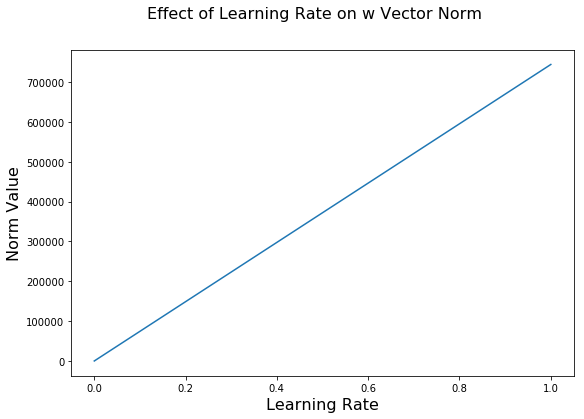

In [79]:
norms = []

for i in range(len(w_vectors)):
    norms.append(np.linalg.norm(w_vectors[i]))

# Plot the values gathered above
fig = plt.figure(figsize=(9,6))
plt.plot(learning_rates,norms)
fig.suptitle('Effect of Learning Rate on w Vector Norm', fontsize=16)
plt.xlabel('Learning Rate', fontsize=16)
plt.ylabel('Norm Value', fontsize=16)

In [78]:
print learning_rates

[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.  ]


In [66]:
print w_vectors[0]

[ -0.07   -0.047  -0.232  -0.36   -0.581  -0.97   -1.927  -3.125  -4.005
  -3.455  -1.647  -0.992  -0.358  -0.182  -0.195  -0.934  -1.089  -0.168
  -0.707  -1.396  -2.729  -4.622  -7.245  -9.311 -10.105  -8.565  -4.675
  -2.408  -0.986  -0.695  -1.625  -2.469  -1.37   -0.264  -0.989  -2.529
  -4.506  -6.766  -9.043 -10.457 -10.551  -8.744  -5.188  -2.593  -1.496
  -2.158  -2.806  -2.576  -1.227  -0.345  -1.951  -3.431  -5.228  -6.644
  -7.641  -8.208  -8.516  -7.958  -5.195  -3.087  -2.966  -3.136  -3.055
  -2.668  -1.441  -0.805  -2.494  -4.082  -5.211  -5.916  -5.38   -5.553
  -7.252  -7.319  -5.645  -4.551  -3.984  -3.594  -3.299  -3.582  -2.021
  -0.862  -2.446  -4.115  -4.719  -3.914  -3.216  -4.071  -6.189  -7.45
  -6.958  -5.854  -4.688  -4.025  -4.281  -3.955  -1.98   -0.901  -2.468
  -3.35   -2.945  -2.113  -2.018  -3.56   -5.955  -8.269  -8.524  -6.588
  -5.202  -4.873  -4.268  -3.449  -1.631  -0.732  -1.951  -1.92   -1.612
  -1.179  -1.519  -3.926  -7.036  -9.547  -9.247  -7

In [ ]:
# Experimenting with different learing values

## Thought: Maybe we can use the norm to quantify the effect of the learning rate on our w vector
